In [1]:
import tensorflow as tf
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

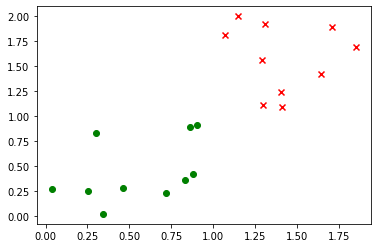

In [2]:
n_features = 2

def get_data():
    data_a = np.random.rand(10, n_features) + 1
    data_b = np.random.rand(10, n_features)
    
    plt.scatter(data_a[:, 0], data_a[:, 1], c='r', marker='x')
    plt.scatter(data_b[:, 0], data_b[:, 1], c='g', marker='o')
    plt.show()
    
    return data_a, data_b

data_a, data_b = get_data()
data_a = data_a.astype(np.double)
data_b = data_b.astype(np.double)

In [3]:
n_hidden=10

In [4]:
class Model(object):
    
    def __init__(self):
        self.w1_i = tf.Variable(tf.random.normal([n_features, n_hidden], dtype=tf.double), name="w1", dtype=tf.double)
        tf.summary.histogram("w1", self.w1_i)
        self.b1_i = tf.Variable(tf.random.normal([n_hidden], dtype=tf.double), name="b1", dtype=tf.double)
        tf.summary.histogram("b1", self.b1_i)
        
        self.w2_o = tf.Variable(tf.random.normal([n_hidden, 1], dtype=tf.double), name="w2")
        tf.summary.histogram("w2", self.w2_o)
        self.b2_o = tf.Variable(tf.random.normal([1], dtype=tf.double), name="b2")
        tf.summary.histogram("b2", self.b2_o)

    def __call__(self, x, y):
        h1 = tf.nn.dropout(tf.nn.relu(tf.matmul(x, self.w1_i) + self.b1_i), rate=0.5)
        tf.summary.histogram("h1", h1)
        h2 = tf.nn.dropout(tf.nn.relu(tf.matmul(y, self.w1_i) + self.b1_i), rate=0.5)
        tf.summary.histogram("h2", h2)
        
        s1 = tf.matmul(h1, self.w2_o) + self.b2_o
        s2 = tf.matmul(h2, self.w2_o) + self.b2_o
        
        s12 = s1 - s2
        s12_flat = tf.reshape(s12, [-1])
        
        return s12_flat
    
    def get_embeddings_s1(self, x):
        h1 = tf.nn.dropout(tf.nn.relu(tf.matmul(x, self.w1_i) + self.b1_i), rate=0.5)
        s1 = tf.matmul(h1, self.w2_o) + self.b2_o
        return s1
        
        

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [6]:
def loss(model, inputs, inputs2):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model(inputs, inputs2) + 1, labels=tf.zeros_like(model(inputs, inputs2))))

In [7]:
def train_step(model, inputs, inputs2):
    trainable_variables = [model.w1_i, model.b1_i, model.w2_o, model.b2_o]
    with tf.GradientTape() as t:
        current_loss = loss(model, inputs, inputs2)
        
    grads = t.gradient(current_loss, trainable_variables)
    optimizer.apply_gradients(zip(grads,trainable_variables))
    return current_loss

In [8]:
model = Model()

In [9]:
for epoch in range(0, 10000):
    err = train_step(model, data_a, data_b)
    if epoch % 100 == 0 :
        print("Step %d Train Loss %f " % (epoch, err.numpy()))


Step 0 Train Loss 0.000000 
Step 100 Train Loss 0.000000 
Step 200 Train Loss 0.000000 
Step 300 Train Loss 0.000000 
Step 400 Train Loss 0.000000 
Step 500 Train Loss 0.000000 
Step 600 Train Loss 0.000000 
Step 700 Train Loss 0.000000 
Step 800 Train Loss 0.000000 
Step 900 Train Loss 0.000000 
Step 1000 Train Loss 0.000000 
Step 1100 Train Loss 0.000000 
Step 1200 Train Loss 0.000000 
Step 1300 Train Loss 0.000000 
Step 1400 Train Loss 0.000000 
Step 1500 Train Loss 0.000000 
Step 1600 Train Loss 0.000000 
Step 1700 Train Loss 0.000000 
Step 1800 Train Loss 0.000000 
Step 1900 Train Loss 0.000000 
Step 2000 Train Loss 0.000000 
Step 2100 Train Loss 0.000000 
Step 2200 Train Loss 0.000000 
Step 2300 Train Loss 0.000000 
Step 2400 Train Loss 0.000000 
Step 2500 Train Loss 0.000000 
Step 2600 Train Loss 0.000000 
Step 2700 Train Loss 0.000000 
Step 2800 Train Loss 0.000000 
Step 2900 Train Loss 0.000000 
Step 3000 Train Loss 0.000000 
Step 3100 Train Loss 0.000000 
Step 3200 Train Loss

In [10]:
grid_size = 10
data_test = []
for y in np.linspace(0., 1., num=grid_size):
    for x in np.linspace(0., 1., num=grid_size):
        data_test.append([x, y])

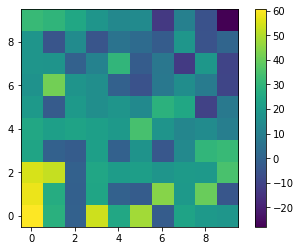

In [11]:
def visualize_results(data_test):
    plt.figure()
    scores_test = model.get_embeddings_s1(data_test)
    scores_img = np.reshape(scores_test, [grid_size, grid_size])
    plt.imshow(scores_img, origin='lower')
    plt.colorbar()

visualize_results(data_test)